In [328]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [329]:
df = pd.read_csv("/content/Unemployment_Rate_upto_11_2020.csv")

In [330]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [331]:
df.shape

(267, 9)

In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [333]:
df.rename(columns={
    df.columns[0]:"States",
    df.columns[1]:"Date",
    df.columns[2]:"Frequency",
    df.columns[3]:"Estimated Unemployment Rate",
    df.columns[4]:"Estimated Employed",
    df.columns[5]:"Estimated Labour Participation Rate",
    df.columns[6]:"Region",
},inplace = True)

In [334]:
df['Date'] = pd.to_datetime(df['Date'])
df['Frequency'] = df['Frequency'].astype('category')
df['Region'] = df['Region'].astype('category')

In [335]:
df['Month'] = df['Date'].dt.month

#EDA

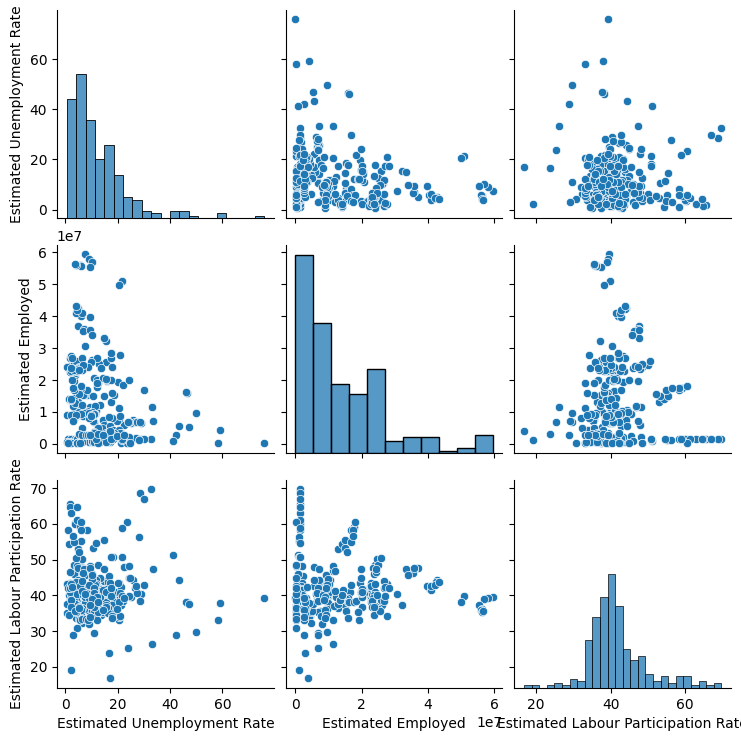

In [336]:
sns.pairplot(df[['Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate']])

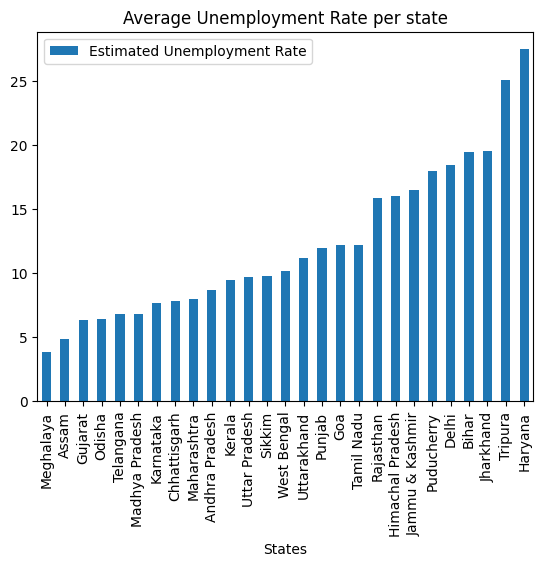

In [337]:
temp_df = df[['Estimated Unemployment Rate','States']]
tmp = temp_df.groupby('States').mean().sort_values('Estimated Unemployment Rate')
tmp.plot(kind='bar')
plt.title("Average Unemployment Rate per state")
plt.show()

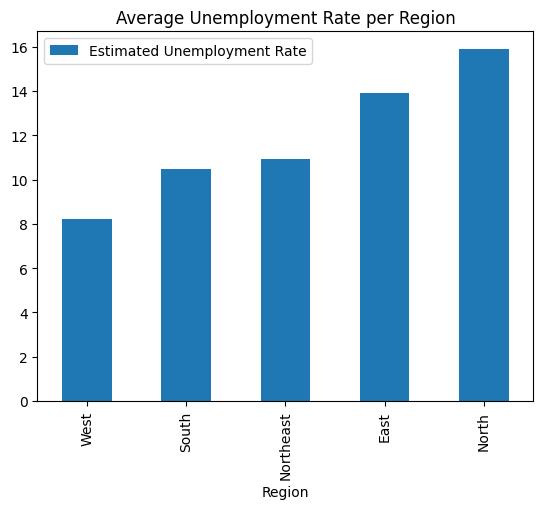

In [338]:
temp_df = df[['Estimated Unemployment Rate','Region']]
tmp = temp_df.groupby('Region').mean().sort_values('Estimated Unemployment Rate')
tmp.plot(kind='bar')
plt.title("Average Unemployment Rate per Region")
plt.show()

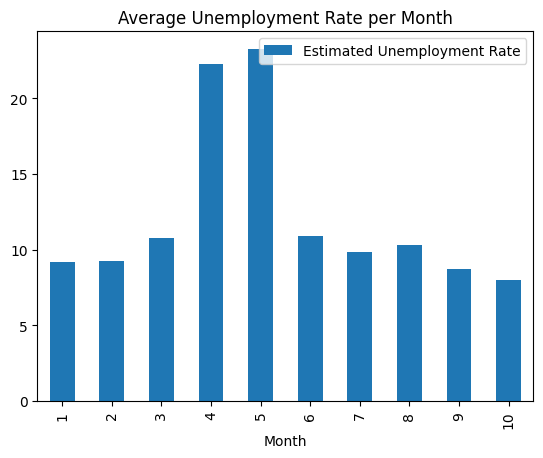

In [339]:
temp_df = df[['Estimated Unemployment Rate','Month']]
tmp = temp_df.groupby('Month').mean()
tmp.plot(kind='bar')
plt.title("Average Unemployment Rate per Month")
plt.show()

# Visualising Unemployment before and After Lockdown
### Lockdown: month>=4 && month<=8

In [378]:
inlock = df[(df['Month']>=4) & (df['Month']<=8)]
outlock = df[(df['Month']>=1) & (df['Month']<4)]

In [379]:
df_in_tmp = inlock[['States','Estimated Unemployment Rate']]
df_in = df_in_tmp.groupby('States').mean().reset_index()

df_out_tmp = outlock[['States','Estimated Unemployment Rate']]
df_out = df_out_tmp.groupby('States').mean().reset_index()

In [380]:
lockdown_df = df_in
lockdown_df['Before'] = df_out['Estimated Unemployment Rate']

lockdown_df.rename(columns={
    lockdown_df.columns[0]:'States',
    lockdown_df.columns[1]:'After Lockdown imposed',
    lockdown_df.columns[2]:'Before Lockdown imposed',
},inplace=True)

lockdown_df.head()

,States,After Lockdown imposed,Before Lockdown imposed
0,Andhra Pradesh,11.310,5.700000
1,Assam,6.102,4.613333
2,Bihar,27.330,12.110000
3,Chhattisgarh,8.808,8.523333
4,Delhi,22.246,18.036667


In [381]:
lockdown_df['%change'] = round((lockdown_df['After Lockdown imposed']-lockdown_df['Before Lockdown imposed'])/lockdown_df['Before Lockdown imposed'],3)

In [382]:

lockdown_df.head()

,States,After Lockdown imposed,Before Lockdown imposed,%change
0,Andhra Pradesh,11.310,5.700000,0.984
1,Assam,6.102,4.613333,0.323
2,Bihar,27.330,12.110000,1.257
3,Chhattisgarh,8.808,8.523333,0.033
4,Delhi,22.246,18.036667,0.233


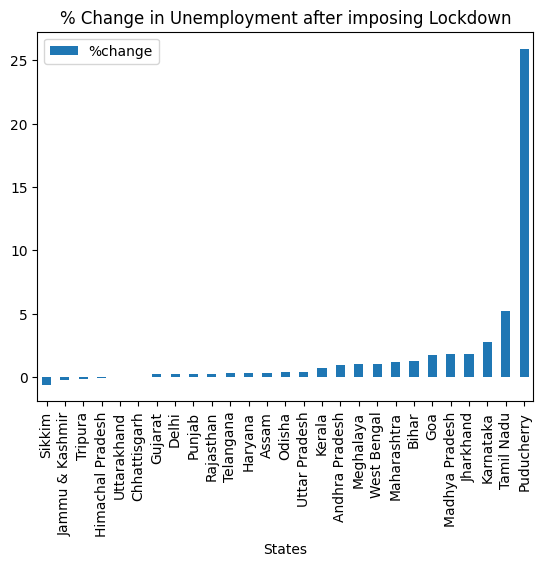

In [383]:
change_plot = lockdown_df.sort_values('%change')

change_plot.plot(x='States', y='%change',kind='bar')
plt.title("% Change in Unemployment after imposing Lockdown")
plt.show()